In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct
import warnings
import xarray as xr
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle

In [2]:
# set ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [3]:
# set main directory
main_dir = r'C:\Users\illic\Python\data_hiwi\Emschergenossenschaft'

In [4]:
# set path to data
emscher_path = os.path.join(main_dir, r'EGLV_PWS_dataset_5min_v03.nc')

In [80]:
# read data
ds_emscher = xr.open_dataset(emscher_path)

In [81]:
# id neu setzen
id = np.arange(1, len(ds_emscher.id) + 1, 1) # oder: id = ['id_' + str(id) for id in (np.arange(1, len(ds_emscher.id) + 1, 1))]
ds_emscher['id'] = id

In [82]:
# create DataFrame
df_emscher = pd.DataFrame(data=ds_emscher.rainfall.sel(id=slice(1, 10)).values.T, index=ds_emscher.time.values ,columns=ds_emscher.id.sel(id=slice(1, 10)).values)

# create DataFrame with no NaN values
df_emscher_nonan = df_emscher.fillna(0)

In [8]:
# create DataFrame with coordinates
df_coordinaten_emscher = pd.DataFrame(data=(ds_emscher.lon.values, ds_emscher.lat.values), index=['lon', 'lat'], columns=ds_emscher.id.values).T

In [9]:
# transform coordinates to x, y

# x, y = fct.LatLon_To_XY(primary_locations_df['lon'], primary_locations_df['lat'])
# coordinates_primary_utm32 = pd.DataFrame({'lon': x, 'lat': y}, index=primary_locations_df.index)

x, y = fct.LatLon_To_XY(df_coordinaten_emscher['lon'], df_coordinaten_emscher['lat'])
coordinates_secondary_utm32 = pd.DataFrame({'lon': x, 'lat': y}, index=df_coordinaten_emscher.index)

In [10]:
df_coordinaten_emscher

,lon,lat
1,6.548694,51.426193
2,6.526900,51.436256
3,6.535824,51.432460
4,6.545567,51.439660
5,6.538055,51.455025
...,...,...
3546,7.727395,51.910908
3547,8.577646,51.683721
3548,8.433512,51.686384
3549,8.637683,51.847763


In [11]:
df_emscher

,1,2,3,4,5,6,7,8,9,10
2014-04-26 16:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-26 16:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-26 16:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-26 16:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-26 16:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-01-10 23:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-10 23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-10 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-10 23:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


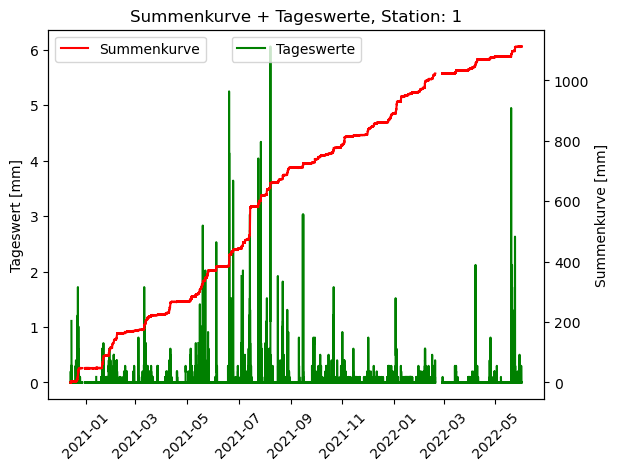

Gesamtniederschlag über Zeitraum: 1112.6 mm



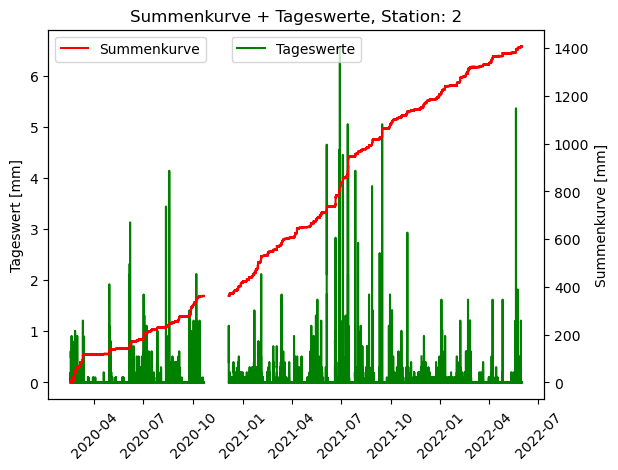

Gesamtniederschlag über Zeitraum: 1406.42 mm



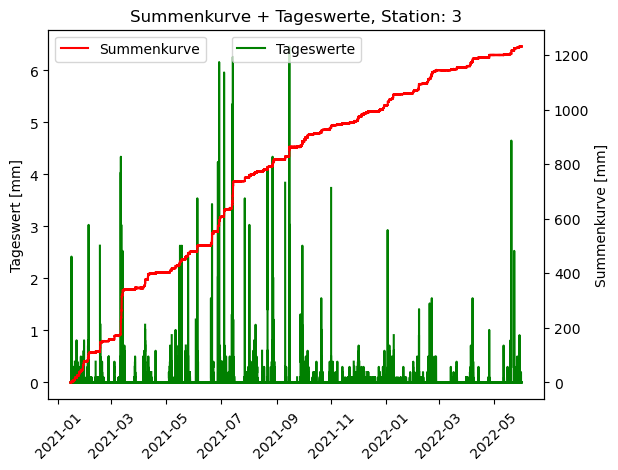

Gesamtniederschlag über Zeitraum: 1231.49 mm



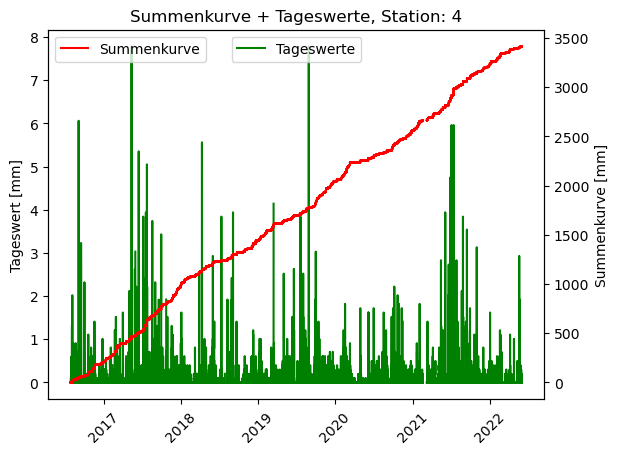

Gesamtniederschlag über Zeitraum: 3413.55 mm



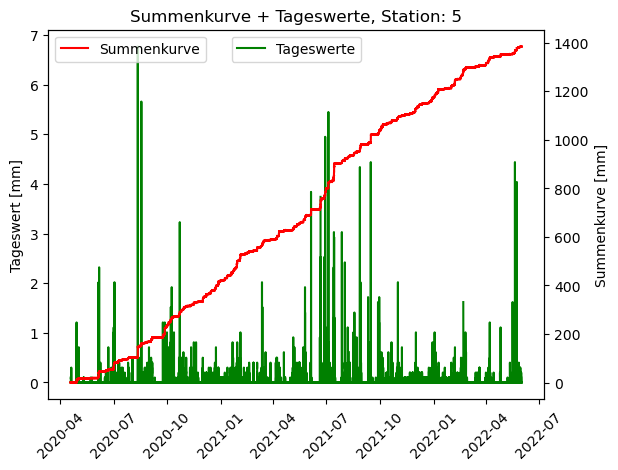

Gesamtniederschlag über Zeitraum: 1384.74 mm



In [12]:
for i in range(1, 6):
    fct.sum_curve(df_emscher, i, df_emscher.index[0], df_emscher.index[-1])

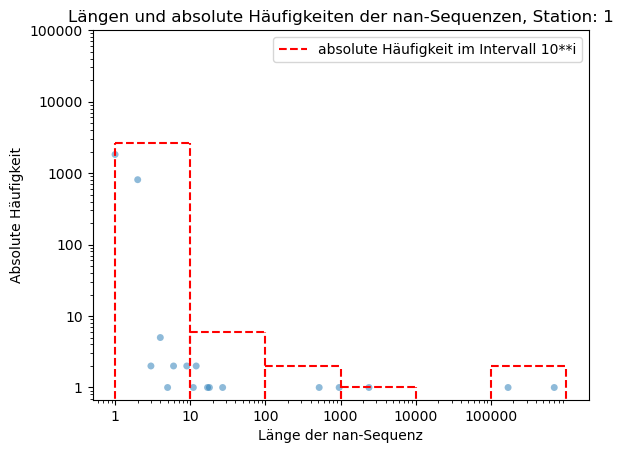

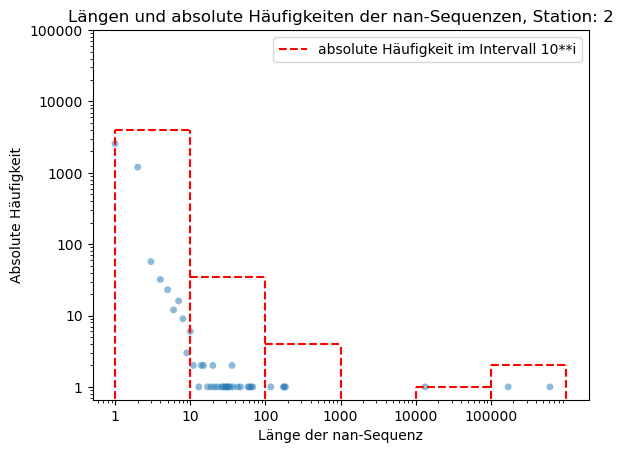

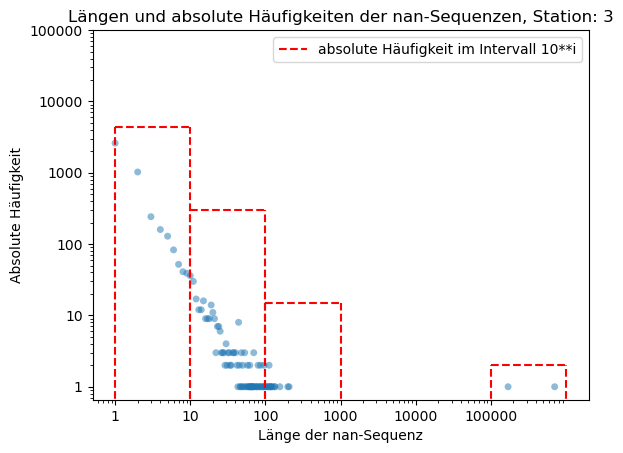

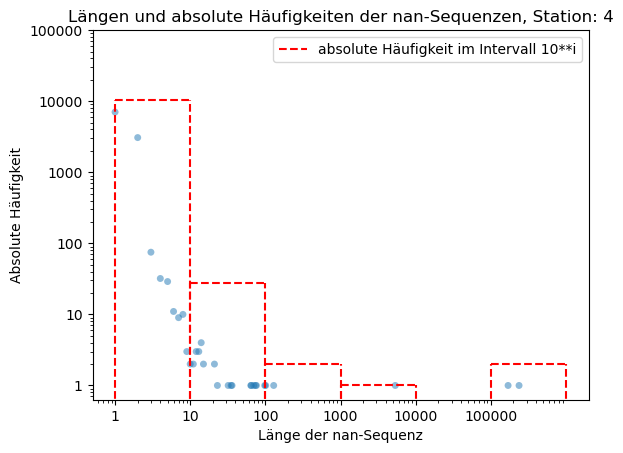

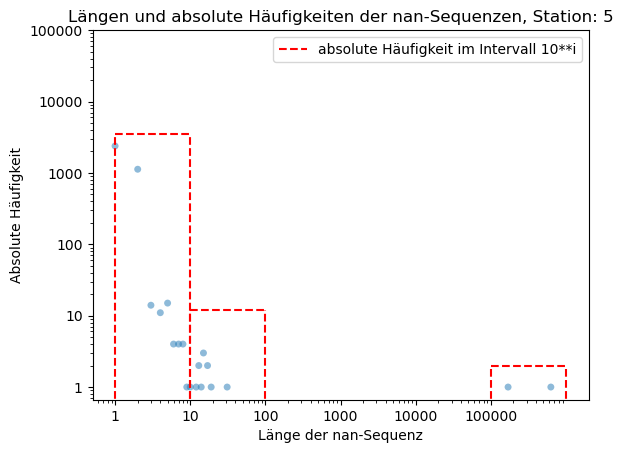

In [13]:
for i in range(1, 6):
    fct.histogramm_scatter(df_emscher, i, '5min')

In [14]:
for i in range(1, 6):
    x, y = np.unique(fct.list_nan_sequences_schnell(df_emscher, i, '5min')[2], return_counts=True)
    print('id', str(i) + ':', 'longest sequenze: ', x.max())

id 1: longest sequenze:  698040
id 2: longest sequenze:  611374
id 3: longest sequenze:  707042
id 4: longest sequenze:  237357
id 5: longest sequenze:  628943


In [15]:
for i in range(1, 6):
    print('id', str(i) + ':', 'Anzahl Peaks:', len(fct.get_data_nan_seq_before_peak(df_emscher, 'sc', i, 0.99)[3]))

id 1: Anzahl Peaks: 23
id 2: Anzahl Peaks: 23
id 3: Anzahl Peaks: 61
id 4: Anzahl Peaks: 136
id 5: Anzahl Peaks: 20


In [16]:
def sum_curve(data, station, date_start, date_end):

    # set DataFrame for this run of this funktion
    dataframe = data
    
    # Messwerte der Station aufsummieren
    sum_list = dataframe.cumsum().values
    sum = dataframe.sum().item()

    # "Summendataframe" erstellen
    index_sum_df = dataframe.time.values
    sum_df = pd.Series(data=sum_list, index=index_sum_df)

    # Subplot erstellen
    fig, ax = plt.subplots()

    # plot Tageswerte
    ax.plot(index_sum_df, dataframe, label='Tageswerte', color='green')
    ax.set_ylabel('Tageswert [mm]')
    plt.xticks(rotation=45)
    plt.legend(loc=9)

    # plot Summenkurve
    ax = ax.twinx()
    ax.plot(index_sum_df, sum_list, label='Summenkurve', color='red')
    ax.set_ylabel('Summenkurve [mm]')
    plt.legend(loc=2)

    name_plot = 'Summenkurve + Tageswerte, Station: ' + str(station)
    plt.title(name_plot)
    plt.xlabel('DateTime')
    plt.legend()
    
    plt.show()
    plt.close()
    
    return print('Gesamtniederschlag über Zeitraum:', round(sum, 2), 'mm\n') # (print('Index Station', str(station), ': \n\n', index_sum_df, '\n\n', 'Summe aktuel zu Zeitstempel:\n\n', sum_df))


In [17]:
# for i in range(1, 6):
#     sum_curve(ds_emscher.rainfall.sel(id=i), i, ds_emscher.sel(id=i).time[0], ds_emscher.sel(id=i).time[-1])

In [18]:
list_nans_gesamt = []
list_nan_sequences = []
list_nan_sequences_1_2 = []
list_peaks = []
list_nans_gesamt_corr = []
list_nan_sequences_corr = []
list_verhaeltnis_nans = []
list_verhaeltnis_nan_sequences = []

for station in range(1, 6):
    sum_nan_u = df_emscher[station].isna().sum()
    list_u = fct.list_nan_sequences_schnell(df_emscher, station, '5min')[2]
    x_u, y_u = np.unique(list_u, return_counts=True)
    peaks_u = fct.get_data_nan_seq_before_peak(df_emscher, 'sc', station, 0.99)[3]

    print(station, 'unkorrigiert')
    print('   nans gesamt: ', sum_nan_u)
    print('   nan sequenzen: ', y_u.sum())
    print('   davon 1er und 2er nan sequenzen: ', y_u[0:2].sum())
    print('   peaks: ', len(peaks_u))

    list_nans_gesamt.append(sum_nan_u)
    list_nan_sequences.append(y_u.sum())
    list_nan_sequences_1_2.append(y_u[0:2].sum())
    list_peaks.append(len(peaks_u))

    # sum_nan = df_reutlingen_corrected[station].isna().sum()
    # list = fct.list_nan_sequences_schnell(df_reutlingen_corrected, station, '5min')[2]
    # x, y = np.unique(list, return_counts=True)
    # peaks = fct.get_data_nan_seq_before_peak(df_reutlingen_corrected, 'sc', station, 0.99)[3]

    # print(station, 'korrigiert')
    # print('   nans gesamt: ', sum_nan)
    # print('   nan sequenzen: ', y.sum())
    # print('Verhältnis korrigiert zu unkorrigiert: ', round(((sum_nan_u - sum_nan)/sum_nan_u)*100, 2), '% werden korrigiert')

    # list_nans_gesamt_corr.append(sum_nan)
    # list_nan_sequences_corr.append(y.sum())
    # list_verhaeltnis_nans.append(round(((sum_nan_u - sum_nan)/sum_nan_u)*100))
    # list_verhaeltnis_nan_sequences.append(round(((y_u.sum() - y.sum())/y_u.sum())*100))
    

1 unkorrigiert
   nans gesamt:  875135
   nan sequenzen:  2651
   davon 1er und 2er nan sequenzen:  2628
   peaks:  23
2 unkorrigiert
   nans gesamt:  801910
   nan sequenzen:  3963
   davon 1er und 2er nan sequenzen:  3769
   peaks:  23
3 unkorrigiert
   nans gesamt:  895064
   nan sequenzen:  4694
   davon 1er und 2er nan sequenzen:  3626
   peaks:  61
4 unkorrigiert
   nans gesamt:  427306
   nan sequenzen:  10311
   davon 1er und 2er nan sequenzen:  10109
   peaks:  136
5 unkorrigiert
   nans gesamt:  803653
   nan sequenzen:  3575
   davon 1er und 2er nan sequenzen:  3508
   peaks:  20


In [19]:
def coordinates(loc_prim, loc_sec, y, station, ref1, ref2, ref3, ref4):
    
    if y == 'primary':
        coords_lon = loc_prim['lon']
        coords_lat = loc_prim['lat']
    elif y == 'secondary':
        coords_lon = loc_sec.lon
        coords_lat = loc_sec.lat
    elif y == 'both':
        coords_lon_prim = loc_prim['lon']
        coords_lat_prim = loc_prim['lat']
        coords_lon_sec = loc_sec['lon']
        coords_lat_sec = loc_sec['lat']

    if y == 'both':
        name_plot = 'Coordinates ' + y + ' networks'
        plt.scatter(x=coords_lon_prim, y=coords_lat_prim, s=20, color='red', label='primary network', marker='x', linewidth=1)
        plt.scatter(x=coords_lon_sec, y=coords_lat_sec, s=2, color='blue', label='secondary network', alpha=0.5)
        if type(station) == int:
            plt.scatter(loc_prim['lon'].iloc[station], loc_prim['lat'].iloc[station], color='black')
        plt.legend()
    else:
        name_plot = 'Coordinates ' + y + ' network'
        plt.scatter(x=coords_lon, y=coords_lat, s=10)
        if type(station) == int:
            if y == 'primary':
                plt.scatter(loc_prim['lon'].iloc[station], loc_prim['lat'].iloc[station], color='red')
            elif y == 'secondary':
                plt.scatter(loc_sec.lon.sel(id=station), loc_sec.lat.sel(id=station), color='red')

            try:
                plt.scatter(loc_sec['lon'].iloc[ref1 - 1], loc_sec['lat'].iloc[ref1 - 1], color='lime', s=10)
                plt.scatter(loc_sec['lon'].iloc[ref2 - 1], loc_sec['lat'].iloc[ref2 - 1], color='lime', s=10)
                plt.scatter(loc_sec['lon'].iloc[ref3 - 1], loc_sec['lat'].iloc[ref3 - 1], color='lime', s=10)
                plt.scatter(loc_sec['lon'].iloc[ref4 - 1], loc_sec['lat'].iloc[ref4 - 1], color='lime', s=10)
            except:
                pass

    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title(name_plot)

    plt.show()
    plt.close()
    
    return # print(coords_lon, coords_lat)

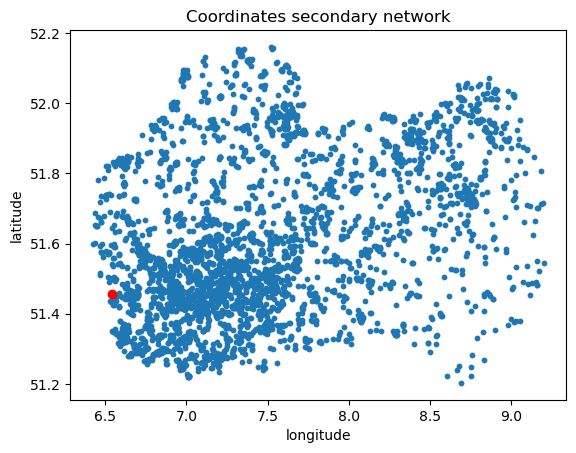

In [20]:
coordinates(ds_emscher, ds_emscher, 'secondary', 5, '-', '-', '-', '-')

In [21]:
# ds_emscher['id']

In [22]:
# ds_emscher.sel(id=1).lon

In [43]:
def coordinates_all_stations_in_range(loc_prim, loc_sec, y, station, ref1, ref2, ref3, ref4, frame, geo, radius, ref_df, all_stations_in_range):
    
    if y == 'primary':
        coords_lon = loc_prim['lon']
        coords_lat = loc_prim['lat']
    elif y == 'secondary':
        coords_lon = loc_sec['lon']
        coords_lat = loc_sec['lat']
    elif y == 'both':
        coords_lon_prim = loc_prim['lon']
        coords_lat_prim = loc_prim['lat']
        coords_lon_sec = loc_sec['lon']
        coords_lat_sec = loc_sec['lat']

    if y == 'both':
        name_plot = 'Coordinates ' + y + ' networks'
        plt.scatter(x=coords_lon_prim, y=coords_lat_prim, s=20, color='red', label='primary network', marker='x', linewidth=1)
        plt.scatter(x=coords_lon_sec, y=coords_lat_sec, s=2, color='blue', label='secondary network', alpha=0.5)
        if type(station) == int:
            plt.scatter(loc_prim['lon'].loc[station], loc_prim['lat'].loc[station], color='black')
        plt.legend()
    else:
        name_plot = 'Coordinates ' + y + ' network: ams' + str(station)
        plt.scatter(x=coords_lon, y=coords_lat, s=10)
        if type(station) == int:
            if y == 'primary':
                plt.scatter(loc_prim['lon'].loc[station], loc_prim['lat'].loc[station], color='red')
            elif y == 'secondary':
                plt.scatter(loc_sec['lon'].loc[station], loc_sec['lat'].loc[station], color='red')

            if all_stations_in_range:
                for station_ref in ref_df.index:
                    plt.scatter(loc_sec['lon'].loc[station_ref], loc_sec['lat'].loc[station_ref], color='lime', s=10)
            else:
                try:
                    plt.scatter(loc_sec['lon'].loc[ref1], loc_sec['lat'].loc[ref1], color='lime', s=10)
                    plt.scatter(loc_sec['lon'].loc[ref2], loc_sec['lat'].loc[ref2], color='lime', s=10)
                    plt.scatter(loc_sec['lon'].loc[ref3], loc_sec['lat'].loc[ref3], color='lime', s=10)
                    plt.scatter(loc_sec['lon'].loc[ref4], loc_sec['lat'].loc[ref4], color='lime', s=10)
                except:
                    pass

    if geo == 'circle':
        kreis = Circle((loc_sec['lon'].loc[station], loc_sec['lat'].loc[station]), radius=radius, color='black', linewidth=0.5, fill=False)
        plt.gca().add_patch(kreis)
    elif geo == 'rectangle':
        quadrat = Rectangle((loc_sec['lon'].loc[station] - radius, loc_sec['lat'].loc[station] - radius), radius*2, radius*2, color='black', linewidth=0.5, fill=False)
        plt.hlines(loc_sec['lat'].loc[station], loc_sec['lon'].loc[station] - radius, loc_sec['lon'].loc[station] + radius, linewidths=0.5, color='black')
        plt.vlines(loc_sec['lon'].loc[station], loc_sec['lat'].loc[station] - radius, loc_sec['lat'].loc[station] + radius, linewidths=0.5, color='black')
        plt.gca().add_patch(quadrat) 

    plt.axis('equal')

    if type(frame) == int:
        try:
            plt.xlim(loc_sec['lon'].loc[station] - frame, loc_sec['lon'].loc[station] + frame)
        except:
            if ((loc_sec['lon'].loc[station] - frame) < loc_sec['lon'].min()):
                plt.xlim(loc_sec['lon'].min(), loc_sec['lon'].loc[station] + frame)
            if ((loc_sec['lon'].loc[station] + frame) > loc_sec['lon'].max()):
                plt.xlim(loc_sec['lon'].loc[station] - frame, loc_sec['lon'].max())
        try:
            plt.ylim(loc_sec['lat'].loc[station] - frame, loc_sec['lat'].loc[station] + frame)
        except:
            if ((loc_sec['lat'].loc[station] - frame) < loc_sec['lat'].min()):
                plt.ylim(loc_sec['lat'].min(), loc_sec['lat'].loc[station] + frame)
            if ((loc_sec['lat'].loc[station] + frame) > loc_sec['lat'].max()):
                plt.ylim(loc_sec['lat'].loc[station] - frame, loc_sec['lat'].max())
    else:
        pass
    
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title(name_plot)

    plt.show()
    plt.close()
    
    return

In [49]:
def find_all_stations_in_range(loc_prim, loc_sec, station, frame, geo, radius, all_stations_in_range, plot=True):
    coordinates = loc_sec
    # finde stationen, die innerhalb eines bestimmten Bereich um die Station liegen
    # set frame for search

    # set coordinates of the station
    lon_station = coordinates['lon'].loc[station]
    lat_station = coordinates['lat'].loc[station]

    list_reference_stations_lon = []
    list_reference_stations_lat = []
    list_station = []
    list_distance = []

    # find the 4 nearest stations in frame
    for i in coordinates.index:
        lon = coordinates['lon'].loc[i]
        lat = coordinates['lat'].loc[i]
        if (np.sqrt((lon - lon_station)**2 + (lat - lat_station)**2) <= radius):
            if lon == lon_station and lat == lat_station:
                pass
            else:
                # print('lon:', lon, 'lat:', lat, '\nstation nr.:', i)
                # print('\n')

                distance = round(np.sqrt((lon - lon_station)**2 + (lat - lat_station)**2), 2)
                
                list_distance.append(distance)
                list_station.append(i)
                list_reference_stations_lon.append(round(lon, 2))
                list_reference_stations_lat.append(round(lat, 2))
        
        array_reference_stations = np.array([list_reference_stations_lon, list_reference_stations_lat, list_distance]).T
        df_reference_stations = pd.DataFrame(array_reference_stations, columns=['lon', 'lat', 'distance'], index=list_station)

    if plot:
        if all_stations_in_range:
            coordinates_all_stations_in_range(loc_prim, loc_sec, 'secondary', station, '-', '-', '-', '-', frame, geo, radius, df_reference_stations, all_stations_in_range)
        else:
            if len(df_reference_stations) == 0:
                pass
            elif len(df_reference_stations) == 1:
                coordinates_all_stations_in_range(loc_prim, loc_sec, 'secondary', station, df_reference_stations.index[0], '-', '-', '-', frame, geo, radius, df_reference_stations, all_stations_in_range)
            elif len(df_reference_stations) == 2:
                coordinates_all_stations_in_range(loc_prim, loc_sec, 'secondary', station, df_reference_stations.index[0], df_reference_stations.index[1], '-', '-', frame, geo, radius, df_reference_stations, all_stations_in_range)
            elif len(df_reference_stations) == 3:
                coordinates_all_stations_in_range(loc_prim, loc_sec, 'secondary', station, df_reference_stations.index[0], df_reference_stations.index[1], df_reference_stations.index[2], '-', frame, geo, radius, df_reference_stations, all_stations_in_range)
            elif len(df_reference_stations) == 4:
                coordinates_all_stations_in_range(loc_prim, loc_sec, 'secondary', station, df_reference_stations.index[0], df_reference_stations.index[1], df_reference_stations.index[2], df_reference_stations.index[3], frame, geo, radius, df_reference_stations, all_stations_in_range)

    return df_reference_stations

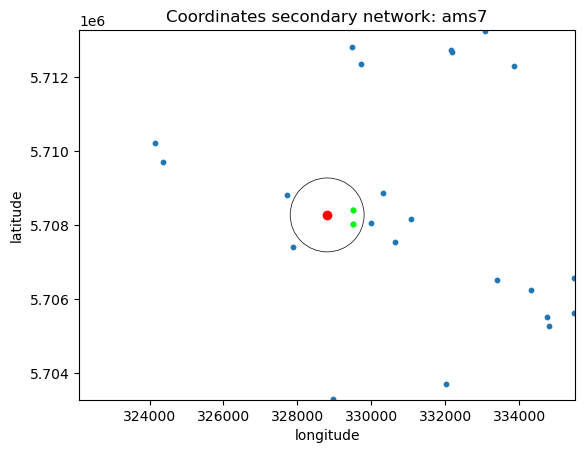

,lon,lat,distance
8,329495.01,5708035.97,731.35
9,329503.94,5708426.05,712.74


In [53]:
df_reference_stations = find_all_stations_in_range(coordinates_secondary_utm32, coordinates_secondary_utm32, 7, 5000, 'circle', radius=1000, all_stations_in_range=True)
df_reference_stations

In [26]:
# df_emscher

In [27]:
def berechnung_gewichte_emscher(df_reference_stations):

    list_gewichte = []

    # berechnung Teiler
    teiler = 0
    for ref_station in df_reference_stations.index:
        teiler += (1/(df_reference_stations['distance'].loc[ref_station])**2)

    # berechnung Gewichte der Referenzstationen
    for ref_station in df_reference_stations.index:
        weight = (1/(df_reference_stations['distance'].loc[ref_station])**2)/teiler
        list_gewichte.append(weight)

    df_reference_stations['weight'] = list_gewichte

    return df_reference_stations

In [28]:
berechnung_gewichte_emscher(df_reference_stations)

,lon,lat,distance,weight
8,329495.01,5708035.97,731.35,0.487115
9,329503.94,5708426.05,712.74,0.512885


In [29]:
def berechnung_referenzniederschlag_emscher(df_reference_stations, df_emscher, df_emscher_nonan, station_zahl):
    
    # df zum speichern der Referenzniederschläge erstellen
    df_reference_values = df_emscher[[station_zahl]].copy()

    # abrufen der Informationen über NaN-Sequenz und Peaks
    list_counts_start, list_counts_end, list_counts, list_index_peak = fct.get_data_nan_seq_before_peak(df_emscher, 'sc', station_zahl, 0.99)

    # berechnung Referenzniederschlag
    # für jede NaN-Sequenz und Peak
    for c, p in zip(range(0, len(list_counts_start)), range(0, len(list_index_peak))):
        # für jeden Index in der NaN-Sequenz
        for index in df_emscher_nonan.loc[list_counts_start[c] : list_index_peak[p]].index:
            h_ref = 0
            # für jede Referenzstation
            for ref_station in df_reference_stations.index:
                h_ref += df_emscher_nonan[ref_station].loc[index] * df_reference_stations['weight'].loc[ref_station]

            # speichern des Referenzniederschlags für den Index
            df_reference_values.loc[index] = h_ref

        # alle Werte außerhalb der NaN-Sequenz und Peaks auf NaN setzen
        if c == 0 and p == 0:
            df_reference_values.loc[(df_reference_values.index[0]) : (list_counts_start[c] - datetime.timedelta(minutes=5))] = np.nan
        if (c > 0 and p > 0) and ((c < len(list_counts_start) - 1) and (p < len(list_index_peak) - 1)):
            df_reference_values.loc[(list_index_peak[p - 1] + datetime.timedelta(minutes=5)) : (list_counts_start[c] - datetime.timedelta(minutes=5))] = np.nan
        if (c == len(list_counts_start) - 1) and (p == len(list_index_peak) - 1):
            df_reference_values.loc[(list_index_peak[p] + datetime.timedelta(minutes=5)) : (df_reference_values.index[-1])] = np.nan
    
    return df_reference_values

In [30]:
df_reference_values = berechnung_referenzniederschlag_emscher(df_reference_stations, df_emscher, df_emscher_nonan, 7)

In [31]:
df_reference_values

,7
2014-04-26 16:30:00,NaN
2014-04-26 16:35:00,NaN
2014-04-26 16:40:00,NaN
2014-04-26 16:45:00,NaN
2014-04-26 16:50:00,NaN
...,...
2024-01-10 23:35:00,NaN
2024-01-10 23:40:00,NaN
2024-01-10 23:45:00,NaN
2024-01-10 23:50:00,NaN


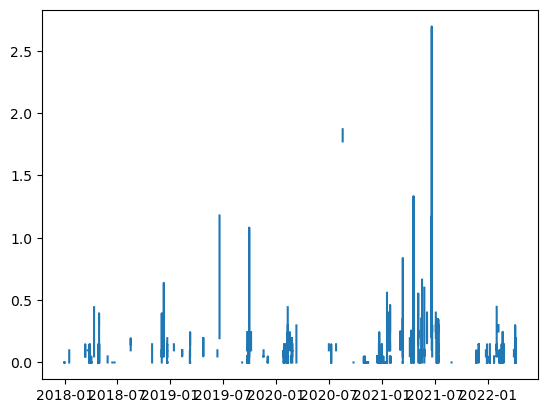

In [32]:
plt.plot(df_reference_values)

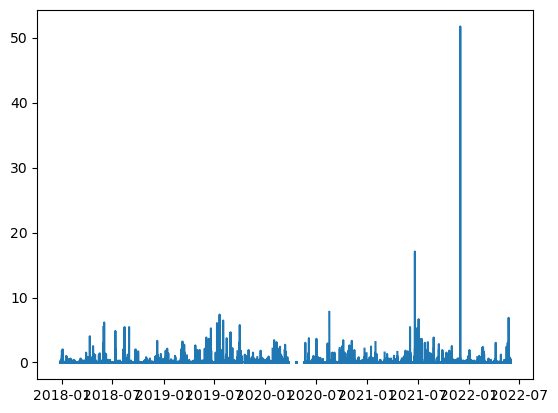

In [33]:
plt.plot(df_emscher[7])

In [34]:
def correct_data_new_emscher(data, reference, station_zahl, quantile, correct_peak=True, correct_1_2=True, correct_0_pres_ref=True):

    # nans vor peaks korrigieren
    if correct_peak:

        output_list_counts_start, output_list_counts_end, output_list_counts, output_list_index_peak = fct.get_data_nan_seq_before_peak(data, 'sc', station_zahl, quantile)
    
        data_corrected = data[[station_zahl]].copy() # copy the data to a new dataframe

        frequency = '5min'

        for i in range(len(output_list_index_peak)):

            datetime_index = pd.date_range(start=output_list_counts_start[i], end=output_list_index_peak[i], freq=frequency) # create a datetime index for the time period of the nan sequence before the peak
            sum = reference[station_zahl].loc[output_list_counts_start[i] : output_list_index_peak[i]].sum() # sum of the reference values for the time period of the nan sequence before the peak
            value_peak = data[station_zahl].loc[output_list_index_peak[i]] # value of the peak

            for index in datetime_index:
                try:
                    peak_portion = round(((reference[station_zahl].loc[index] / sum) * value_peak), 2)
                except ZeroDivisionError:
                    peak_portion = 0
                    
                data_corrected[station_zahl].loc[index] = peak_portion # replace the nan values with the calculated peak portion
            
    # 1er und 2er nan sequenzen korrigieren
    if correct_1_2:

        data_corrected = fct.einer_zweier_sequ_korrigieren(data_corrected, station_zahl, True, True)

    # nan sequenzen korrigieren, die mit 0 anfnagen und enden und bei denen die summe des niederschlag im referenz df 0 ist
    if correct_0_pres_ref:

        starts, ends, nan_sequs = fct.list_nan_sequences_schnell(data_corrected, station_zahl, frequency)

        list = []

        # erste und letzte nan sequenz extra kontrollieren
        sum = reference[station_zahl].loc[starts[0] : ends[0]].values.sum()
        if sum == 0:
            list.append(0)
        sum = reference[station_zahl].loc[starts[-1] : ends[-1]].values.sum()
        if sum == 0:
            list.append(-1)

        for i in range(len(starts)):
            try:
                if ((data_corrected.loc[starts[i] - datetime.timedelta(minutes=5)]) == 0).bool() and ((data_corrected.loc[ends[i] + datetime.timedelta(minutes=5)]) == 0).bool():
                    sum = reference[station_zahl].loc[starts[i] : ends[i]].values.sum()
                    if sum == 0:
                        list.append(i)
            except KeyError:
                continue
            
        for i in list:
            data_corrected.loc[starts[i] : ends[i]] = 0

    return data_corrected

In [35]:
data_corrected = correct_data_new_emscher(df_emscher, df_reference_values, 7, 0.99)

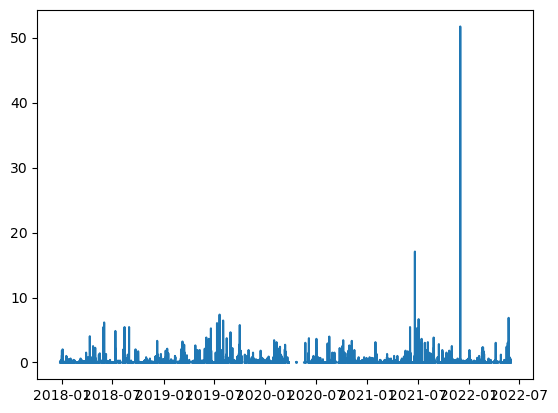

In [36]:
plt.plot(data_corrected)

In [37]:
list_nans_gesamt = []
list_nan_sequences = []
list_nan_sequences_1_2 = []
list_nan_sequences_1_2_corr = []
list_peaks_u = []
list_peaks = []
list_nans_gesamt_corr = []
list_nan_sequences_corr = []
list_verhaeltnis_nans = []
list_verhaeltnis_nan_sequences = []

for station in data_corrected.columns:
    sum_nan_u = df_emscher[station].isna().sum()
    list_u = fct.list_nan_sequences_schnell(df_emscher, station, '5min')[2]
    x_u, y_u = np.unique(list_u, return_counts=True)
    peaks_u = fct.get_data_nan_seq_before_peak(df_emscher, 'sc', station, 0.99)[3]

    # print(station, 'unkorrigiert')
    # print('   nans gesamt: ', sum_nan_u)
    # print('   nan sequenzen: ', y_u.sum())
    # print('   davon 1er und 2er nan sequenzen: ', y_u[0:2].sum())
    # print('   peaks: ', len(peaks_u))

    list_nans_gesamt.append(sum_nan_u)
    list_nan_sequences.append(y_u.sum())
    list_nan_sequences_1_2.append(y_u[0:2].sum())
    list_peaks_u.append(len(peaks_u))

    sum_nan = data_corrected[station].isna().sum()
    list = fct.list_nan_sequences_schnell(data_corrected, station, '5min')[2]
    x, y = np.unique(list, return_counts=True)
    peaks = fct.get_data_nan_seq_before_peak(data_corrected, 'sc', station, 0.99)[3]

    # print(station, 'korrigiert')
    # print('   nans gesamt: ', sum_nan)
    # print('   nan sequenzen: ', y.sum())
    # print('Verhältnis korrigiert zu unkorrigiert: ', round(((sum_nan_u - sum_nan)/sum_nan_u)*100, 2), '% werden korrigiert')

    list_nans_gesamt_corr.append(sum_nan)
    list_nan_sequences_corr.append(y.sum())
    list_verhaeltnis_nans.append(round(((sum_nan_u - sum_nan)/sum_nan_u)*100))
    list_verhaeltnis_nan_sequences.append(round(((y_u.sum() - y.sum())/y_u.sum())*100))
    list_peaks.append(len(peaks))
    list_nan_sequences_1_2_corr.append(y[0:2].sum())

In [38]:
df_emscher_statistik = pd.DataFrame(index=['NaNs gesamt', 'NaN-Sequenzen', '1er und 2er NaN-Sequenzen', 'Peaks', '--------------------------------------------------', 'NaNs nach Korrektur', 'NaN-Sequenzen nach Korrektur', '1er und 2er NaN-Sequenzen nach Korrektur', 'Peaks nach Korrektur', '--------------------------------------------------', '% NaNs korrigiert', '% NaN-Sequenzen korrigiert'], data=[list_nans_gesamt, list_nan_sequences, list_nan_sequences_1_2, list_peaks_u, [], list_nans_gesamt_corr, list_nan_sequences_corr, list_nan_sequences_1_2_corr, list_peaks, [], list_verhaeltnis_nans, list_verhaeltnis_nan_sequences], columns=data_corrected.columns)
df_emscher_statistik = df_emscher_statistik.fillna('')

In [39]:
df_emscher_statistik

,7
NaNs gesamt,620011.0
NaN-Sequenzen,12307.0
1er und 2er NaN-Sequenzen,10565.0
Peaks,191.0
--------------------------------------------------,
NaNs nach Korrektur,604343.0
NaN-Sequenzen nach Korrektur,1668.0
1er und 2er NaN-Sequenzen nach Korrektur,612.0
Peaks nach Korrektur,1.0
--------------------------------------------------,


In [55]:
fct.calculate_correlation_with_without_resample(df_emscher, data_corrected, 7, 7, 0.99, True, True)

0.9971786758880677

In [58]:
fct.calculate_correlation_with_without_resample(df_emscher, df_emscher, 8, 7, 0.99, True, True)

0.4717416819243003

In [59]:
fct.calculate_correlation_with_without_resample(df_emscher, df_emscher, 9, 7, 0.99, True, True)

0.27168799276927874

In [56]:
fct.calculate_correlation_with_without_resample(df_emscher, data_corrected, 8, 7, 0.99, True, True)

0.48393401990459217

In [57]:
fct.calculate_correlation_with_without_resample(df_emscher, data_corrected, 9, 7, 0.99, True, True)

0.29163909995422477

In [60]:
def get_data_nan_seq_before_peak(data, y, station, quantile):

    '''
    outside of function, write:
    output_list_counts_start, output_list_counts_end, output_list_counts, output_list_index_peak = get_data_nan_seq_before_peak(...)
    '''

    if y == 'pr':
        timegap = datetime.timedelta(hours=1)
    elif y == 'sc':
        timegap = datetime.timedelta(minutes=5)

    dataframe = data[station]

    peaks = dataframe[dataframe > dataframe.quantile(quantile)]
    list_index_peak = []
    list_counts = []
    list_counts_start = []
    list_counts_end = []

    for index_peak in peaks.index:
        count = 0
        for i in reversed(dataframe.loc[: index_peak - timegap].isna()):
            if i == True:
                count += 1
            else:
                if count > 0:
                    count_start = index_peak - (timegap * count)
                    list_counts_start.append(count_start)
                    list_counts_end.append(index_peak - timegap)
                    list_counts.append(count)
                    list_index_peak.append(index_peak)
                    break
                else:
                    break      
    return list_counts_start, list_counts_end, list_counts, list_index_peak

In [112]:
def list_nan_sequences_schnell(data, station, timedelta):
    
    '''starts, ends, len_seq'''
    
    if timedelta == '1min':
        timedelta = datetime.timedelta(minutes=1)
    if timedelta == '5min':
        timedelta = datetime.timedelta(minutes=5)
    if timedelta == '1h':
        timedelta = datetime.timedelta(hours=1)

    is_nan = data[station].isna() # gibt true zurück, wenn Wert NaN ist
    diff = is_nan.diff() # gibt true zurück, wenn Wert zu Nan oder Nan zu Wert springt

    # print(is_nan)
    # print(diff)

    if is_nan[0] == True:
        diff[0] = True

    starts = diff[diff == True].index[::2]
    ends = diff[diff == True].index[1::2] - timedelta

    if is_nan[-1] == True:
        ends = ends.append(data.index[-1:])
    elif len(starts) > len(ends):
        starts = starts.delete(-1)

    len_seq = ((ends + timedelta) - starts)/timedelta
    len_seq = len_seq.astype(int)
    
    # print('starts:', starts)
    # print('ends:', ends)
    
    return starts, ends, len_seq

In [99]:
starts, ends, len_seq = list_nan_sequences_schnell(df_emscher, 7, '5min')
peaks = df_emscher[7][df_emscher[7] > df_emscher[7].quantile(0.99)]

starts: DatetimeIndex(['2014-04-26 16:30:00', '2017-12-25 00:05:00',
               '2017-12-25 00:20:00', '2017-12-25 00:30:00',
               '2017-12-25 09:20:00', '2017-12-25 09:35:00',
               '2017-12-25 13:55:00', '2017-12-29 12:40:00',
               '2017-12-29 12:55:00', '2017-12-29 13:20:00',
               ...
               '2022-05-29 23:50:00', '2022-05-30 00:05:00',
               '2022-05-30 00:15:00', '2022-05-30 11:45:00',
               '2022-05-30 12:00:00', '2022-05-30 23:05:00',
               '2022-05-30 23:20:00', '2022-05-30 23:30:00',
               '2022-05-31 08:20:00', '2022-06-01 00:00:00'],
              dtype='datetime64[ns]', length=12307, freq=None)
ends: DatetimeIndex(['2017-12-24 21:00:00', '2017-12-25 00:10:00',
               '2017-12-25 00:20:00', '2017-12-25 00:30:00',
               '2017-12-25 09:25:00', '2017-12-25 09:35:00',
               '2017-12-29 09:10:00', '2017-12-29 12:45:00',
               '2017-12-29 12:55:00', '2017-12-29

In [100]:
df_emscher[7].loc['2017-12-25 00:00:00':'2017-12-25 00:15:00']

2017-12-25 00:00:00    0.0
2017-12-25 00:05:00    NaN
2017-12-25 00:10:00    NaN
2017-12-25 00:15:00    0.0
Name: 7, dtype: float64

In [101]:
ends_p1 = ends + datetime.timedelta(minutes=5)

In [102]:
peaks

2017-12-29 13:55:00    0.30
2017-12-29 14:00:00    0.30
2017-12-30 08:10:00    0.30
2017-12-30 09:25:00    0.30
2017-12-31 01:45:00    0.30
                       ... 
2022-05-27 03:05:00    0.30
2022-05-27 03:10:00    0.81
2022-05-29 08:35:00    0.30
2022-05-31 07:25:00    0.30
2022-05-31 19:05:00    0.50
Name: 7, Length: 3433, dtype: float64

In [103]:
nan_seq_mit_peak = ends_p1.intersection(peaks.index)

In [104]:
nan_seq_mit_peak

DatetimeIndex(['2017-12-31 11:50:00', '2017-12-31 13:20:00',
               '2018-01-17 01:15:00', '2018-03-13 06:50:00',
               '2018-03-22 06:20:00', '2018-03-27 17:55:00',
               '2018-03-28 12:25:00', '2018-03-28 12:55:00',
               '2018-03-28 13:40:00', '2018-03-28 15:20:00',
               ...
               '2022-02-10 11:45:00', '2022-02-11 04:05:00',
               '2022-02-17 07:15:00', '2022-02-19 21:20:00',
               '2022-02-20 22:35:00', '2022-02-20 22:45:00',
               '2022-02-25 13:10:00', '2022-03-31 19:00:00',
               '2022-04-04 11:15:00', '2022-04-05 11:45:00'],
              dtype='datetime64[ns]', length=191, freq=None)

In [105]:
mask = ends_p1.isin(nan_seq_mit_peak) # sind die werte von ends_p1 in nan_seq_mit_peak enthalten?

In [107]:
starts[mask]

DatetimeIndex(['2017-12-31 08:55:00', '2017-12-31 12:05:00',
               '2018-01-17 01:10:00', '2018-03-13 06:40:00',
               '2018-03-22 06:15:00', '2018-03-27 14:20:00',
               '2018-03-28 11:35:00', '2018-03-28 12:30:00',
               '2018-03-28 13:35:00', '2018-03-28 14:45:00',
               ...
               '2022-02-10 10:00:00', '2022-02-11 03:50:00',
               '2022-02-17 07:00:00', '2022-02-19 21:15:00',
               '2022-02-20 22:25:00', '2022-02-20 22:40:00',
               '2022-02-25 12:50:00', '2022-03-31 18:50:00',
               '2022-04-04 11:00:00', '2022-04-05 11:30:00'],
              dtype='datetime64[ns]', length=191, freq=None)

In [109]:
df_emscher[7].loc[starts[mask][0] - datetime.timedelta(minutes=5):nan_seq_mit_peak[0]]

2017-12-31 08:50:00    1.72
2017-12-31 08:55:00     NaN
2017-12-31 09:00:00     NaN
2017-12-31 09:05:00     NaN
2017-12-31 09:10:00     NaN
2017-12-31 09:15:00     NaN
2017-12-31 09:20:00     NaN
2017-12-31 09:25:00     NaN
2017-12-31 09:30:00     NaN
2017-12-31 09:35:00     NaN
2017-12-31 09:40:00     NaN
2017-12-31 09:45:00     NaN
2017-12-31 09:50:00     NaN
2017-12-31 09:55:00     NaN
2017-12-31 10:00:00     NaN
2017-12-31 10:05:00     NaN
2017-12-31 10:10:00     NaN
2017-12-31 10:15:00     NaN
2017-12-31 10:20:00     NaN
2017-12-31 10:25:00     NaN
2017-12-31 10:30:00     NaN
2017-12-31 10:35:00     NaN
2017-12-31 10:40:00     NaN
2017-12-31 10:45:00     NaN
2017-12-31 10:50:00     NaN
2017-12-31 10:55:00     NaN
2017-12-31 11:00:00     NaN
2017-12-31 11:05:00     NaN
2017-12-31 11:10:00     NaN
2017-12-31 11:15:00     NaN
2017-12-31 11:20:00     NaN
2017-12-31 11:25:00     NaN
2017-12-31 11:30:00     NaN
2017-12-31 11:35:00     NaN
2017-12-31 11:40:00     NaN
2017-12-31 11:45:00 

In [110]:
def get_data_nan_seq_before_peak_new(data, station,quantile):

    # get info about nan sequences and peaks
    starts, ends, len_seq = list_nan_sequences_schnell(data, station, '5min') # gives start, end and length of nan sequences
    peaks = data[station][data[station] > data[station].quantile(quantile)] # gives values + index of peak

    # check wich sequence has peak
    ends_plus_timedelta = ends + datetime.timedelta(minutes=5) # add timedelta to ends, because the peak is in the next time step
    peaks_with_nan_seq = ends_plus_timedelta.intersection(peaks.index)

    # create mask to filter for starts of nan sequences with peaks
    mask = ends_plus_timedelta.isin(peaks_with_nan_seq) # are the values of ends_plus_timedelta in ends_nan_seq_mit_peak, to get the place of starts of nan sequences with peaks
    starts_nan_seq_mit_peak = starts[mask]

    return starts_nan_seq_mit_peak, peaks_with_nan_seq  

In [113]:
get_data_nan_seq_before_peak_new(df_emscher, 7, 0.99)

(DatetimeIndex(['2017-12-31 08:55:00', '2017-12-31 12:05:00',
                '2018-01-17 01:10:00', '2018-03-13 06:40:00',
                '2018-03-22 06:15:00', '2018-03-27 14:20:00',
                '2018-03-28 11:35:00', '2018-03-28 12:30:00',
                '2018-03-28 13:35:00', '2018-03-28 14:45:00',
                ...
                '2022-02-10 10:00:00', '2022-02-11 03:50:00',
                '2022-02-17 07:00:00', '2022-02-19 21:15:00',
                '2022-02-20 22:25:00', '2022-02-20 22:40:00',
                '2022-02-25 12:50:00', '2022-03-31 18:50:00',
                '2022-04-04 11:00:00', '2022-04-05 11:30:00'],
               dtype='datetime64[ns]', length=191, freq=None),
 DatetimeIndex(['2017-12-31 11:50:00', '2017-12-31 13:20:00',
                '2018-01-17 01:15:00', '2018-03-13 06:50:00',
                '2018-03-22 06:20:00', '2018-03-27 17:55:00',
                '2018-03-28 12:25:00', '2018-03-28 12:55:00',
                '2018-03-28 13:40:00', '2018-03-